In [30]:
import numpy as np
import pandas as pd
# 파일 불러오기
df = pd.read_csv("netflix_reviews.csv")  
print(df)

                                    reviewId             userName  \
0       166731e8-4b10-4968-838d-329473357328       Sylviah Chichi   
1       68bab7d0-2afc-4454-970f-159ced93d751        Marilyn Goeda   
2       6c2d3e85-b5ca-4228-93bd-abd2236eab51            Nikhil Pk   
3       d62b0303-4c87-4c96-9c2c-a3ca6e0b056d  Mmesoma Eberechukwu   
4       d6014252-863e-4e06-b440-25e0ece47a31    Keabetswe Monaise   
...                                      ...                  ...   
117129  a760ead9-e7aa-4ed1-a651-5c37c3600dac        A Google user   
117130  4957f9e7-d7f4-4a52-9764-031cebcac83f         Captain Jeoy   
117131  9acf7586-7abf-4b50-8c50-3ede3b2a42c4             Suryansh   
117132  32870f7f-c461-4256-b602-75244ca60248        A Google user   
117133  dc1352e9-10a8-41ca-ab23-05d045b08e90           suraj soni   

                                                  content  score  \
0       Great App on the move ..... I can watch my mov...      5   
1                                  

In [32]:
# 데이터프레임의 상단 5개의 데이터와 하단 5개의 데이터 불러오기
print(df.head())
print(df.tail())

                               reviewId             userName  \
0  166731e8-4b10-4968-838d-329473357328       Sylviah Chichi   
1  68bab7d0-2afc-4454-970f-159ced93d751        Marilyn Goeda   
2  6c2d3e85-b5ca-4228-93bd-abd2236eab51            Nikhil Pk   
3  d62b0303-4c87-4c96-9c2c-a3ca6e0b056d  Mmesoma Eberechukwu   
4  d6014252-863e-4e06-b440-25e0ece47a31    Keabetswe Monaise   

                                             content  score  thumbsUpCount  \
0  Great App on the move ..... I can watch my mov...      5              0   
1                                               good      5              0   
2  Need to improve and to update some error durin...      3              0   
3  Netflix is a nice app,but not all the movies a...      3              0   
4  Not much availability considering options on w...      3              0   

    reviewCreatedVersion                   at             appVersion  
0  8.136.0 build 3 50908  2024-10-21 14:15:31  8.136.0 build 3 50908  
1   

In [34]:
# columns과 shape를 불러오기 및 이름 붙이기
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

Shape of the dataset: (117134, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [38]:
# 데이터 전처리 (불용어(쓸모없는 단어, 구두점 등))
# isnull함수와 sum함수를 사용해서 각 열에 대한 결측치 갯수 확인
print(df.info())
print(df.isnull().sum()) 
# userName(닉네임)에 2개의 결측치, content(리뷰내용)에 2개의 결측치
# reviewCreatedVersion(작성된 리뷰 버전)에서는 17488개의 결측치, appVersion(앱버전)에서는 17488개의 결측치를 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117134 entries, 0 to 117133
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              117134 non-null  object
 1   userName              117132 non-null  object
 2   content               117132 non-null  object
 3   score                 117134 non-null  int64 
 4   thumbsUpCount         117134 non-null  int64 
 5   reviewCreatedVersion  99595 non-null   object
 6   at                    117134 non-null  object
 7   appVersion            99595 non-null   object
dtypes: int64(2), object(6)
memory usage: 7.1+ MB
None
reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    17539
at                          0
appVersion              17539
dtype: int64


In [46]:
#중복데이터 확인
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
117129    False
117130    False
117131    False
117132    False
117133    False
Length: 117132, dtype: bool


In [100]:
# 중복 데이터 없고, 날짜도 이미 정해졌고, 점수도 int 값
# 결측치 처리
df.dropna(subset=['userName'], inplace=True)
df.dropna(subset=['content'], inplace=True)
df.dropna(subset=['reviewCreatedVersion'], inplace=True)
df.dropna(subset=['appVersion'], inplace=True)

# 열 정리 (할 필요 없을 것 같은데 혹시 몰라서 했습니다.) 이외 전처리 뭘 해야하는지 감이 안잡혀서 여쭤보려고합니다.
df = df[['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 
         'reviewCreatedVersion', 'at', 'appVersion']]

print(df)

                                    reviewId             userName  \
0       166731e8-4b10-4968-838d-329473357328       Sylviah Chichi   
2       6c2d3e85-b5ca-4228-93bd-abd2236eab51            Nikhil Pk   
3       d62b0303-4c87-4c96-9c2c-a3ca6e0b056d  Mmesoma Eberechukwu   
4       d6014252-863e-4e06-b440-25e0ece47a31    Keabetswe Monaise   
5       057e0263-3b17-4fc0-9018-a44b87f8d683     olowomeye Tomiwa   
...                                      ...                  ...   
117126  9996579a-cf67-40a6-94eb-9ccd63c7d46a        dady mon mari   
117127  f2e61d1c-21eb-44d2-924c-35df26ed3bd2     Romnick Arcangel   
117128  cbb04dd9-1a1d-46df-80a4-8ae987fe5d85   Ciaran Worthington   
117130  4957f9e7-d7f4-4a52-9764-031cebcac83f         Captain Jeoy   
117132  32870f7f-c461-4256-b602-75244ca60248        A Google user   

                                                  content  score  \
0       Great App on the move ..... I can watch my mov...      5   
2       Need to improve and to upda

In [88]:
# Score 이미 int 값이고, 아래 그래프를 위해 점수당 score_counting 개수를 구하기
# 아래 그래프 중점으로 작성하기에 미리 여기다 작성한 것

score_counting = df['score'].value_counts()
print(score_counting)

score
1    38733
5    28134
4    12296
3    10727
2     9703
Name: count, dtype: int64


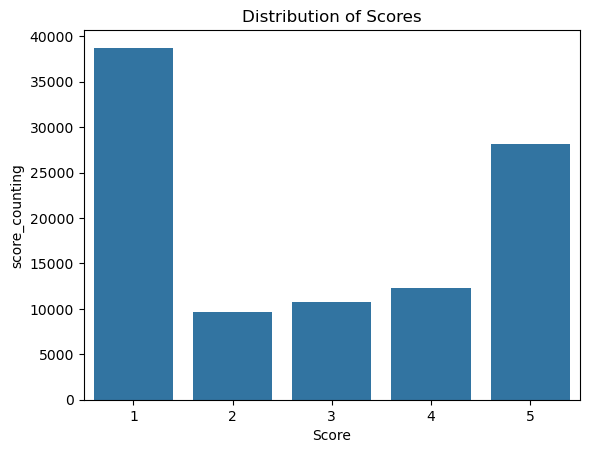

In [89]:
import pandas as pd
# feature 분석 (EDA)
# 데이터를 시각화 하기 위해 seaborn 불러오기
import seaborn as sns
#그래프를 그려야하기 때문에 matplotlib.pyplot 사용 (seaborn 라이브러리 내부의 matplotlib의 서브모듈)
import matplotlib.pyplot as pyplot

# x축(레이블)으로는 Score, y축(레이블)으로는 score_counting(점수개수)을 나타내며
# 그래프를 만들기 위해 데이터 프레임으로 정리
x = [1, 5, 4, 3, 2]
y = [38733, 28134, 12296, 10727, 9703]
data = { 'Score': [1, 5, 4, 3, 2],
    'score_counting': [38733, 28134, 12296, 10727, 9703]}
data = pd.DataFrame(data)

# 막대그래프 함수
# https://wikidocs.net/194443 막대그래프 함수 참
sns.barplot(x = 'Score', y = 'score_counting', data = data)

#그래프 제목은 Distribution of Scores이고,
pyplot.title('Distribution of Scores')

# x축과 y축
pyplot.xlabel('Score')
pyplot.ylabel('score_counting')

#그래프 출력하기
pyplot.show()

In [90]:
# 혹시 그래프 색 바꾸는 법 아시는 분 ㅎㅎ...

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
#로지스틱 회귀 모델 생성
from sklearn.linear_model import LogisticRegression
# 정확도 계산, 분류 보고서 생성, 혼동 행령 생성
from sklearn.metrics import classification_report, confusion_matrix
# 데이터를 훈련,테스트 분류
from sklearn.model_selection import train_test_split
# 데이터 평균을 0, 분산을 1로 스케일링
from sklearn.preprocessing import StandardScaler


# xlsx 파일에서 몇개 뽑아서 예시 리뷰 데이터를 만들기
# 1~5점 각각 최소 하나라도 작성해서 정해서 data 및 데이터프레임 만들기


data = { 
    'content': [
        'Great App on the move ..... I can watch my movies and series from any place',
        'i really like it! there are so many movies and...',
        'I want more new movies n old movies to I love using netflix',
        'this app is awesome for english movies ,series',		
        'Not much availability considering options on what to watch',
        'Netflix is a nice app,but not all the movies are there especially the one you want to watch, they need to work on that is already getting annoying',
        'Why can\'t I change my Netflix plan?',
        'HAVING FREEZE SCREEN VERY OFTEN!',
        'Sound quality is very slow of movies',
        'its very bad' 
    ], 
    'score': [5, 5, 4, 4, 3, 3, 2, 2, 1, 1]
}

df = pd.DataFrame(data)
print(df)



                                             content  score
0  Great App on the move ..... I can watch my mov...      5
1  i really like it! there are so many movies and...      5
2  I want more new movies n old movies to I love ...      4
3     this app is awesome for english movies ,series      4
4  Not much availability considering options on w...      3
5  Netflix is a nice app,but not all the movies a...      3
6                Why can't I change my Netflix plan?      2
7                   HAVING FREEZE SCREEN VERY OFTEN!      2
8               Sound quality is very slow of movies      1
9                                       its very bad      1


In [133]:
x = df['content']
y = df['score']


# X 데이터를 수치화해야하는데 검색해보니까 텍스트 데이터 벡터화라는 것이 있어서 사용했습니다.
# https://blog.naver.com/biz_data/222477453453
# https://blog.naver.com/joje3029/223228946887
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer 객체 생성
vectorizer = CountVectorizer()

# 문서를 벡터로 변환, x 값을 바꿔야함
x = vectorizer.fit_transform(x)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [132]:
# 데이터 스케일링 하는 이유 알고 싶고, 이거 틀린 이유도 알고 싶습니다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Netflix is a nice app,but not all the movies are there especially the one you want to watch, they need to work on that is already getting annoying'

In [143]:

# 모델 생성 및 학습
# 반복 학습을 통해 기본값 100으로 두어 최상의 가중치를 찾기

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)


LogisticRegression(max_iter=200)

In [144]:
# 모델 정확도 평가
# 사이킷런에서 제공하는 정확도 측정 함수를 사용해서 예측예정

from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_test, y_pred)

# 예측
y_pred = model.predict(x_test)

In [146]:
## 정확도 계산, 분류 보고서 생성, 혼동 행령 생성한거 출력
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
[[0 1 0]
 [0 0 0]
 [0 1 0]]


C:\Users\workp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\workp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\workp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\workp\anaconda3\Lib\site-packages\sklea

In [172]:
# 새로운 리뷰에 대한 예측을 할 것
# 값을 비교하기 위해 기존 xlsx 리뷰 = 각 1,5점

new_review = [ 
    'It keeps buffering. Even if I restart my phone, it keeps buffering.', 
    'Good app lots of movies'
]

# 값을 비교하기 위해 벡터화 및 예측
new_review_score = vectorizer.transform(new_review)
predictions = model.predict(new_review_score)

In [175]:
# 예측 결과 출력
for review, score in zip(new_review, predictions):
    print(f"Review: '{review}' => Score: {score}")

Review: 'It keeps buffering. Even if I restart my phone, it keeps buffering.' => Score: 2
Review: 'Good app lots of movies' => Score: 4


In [ ]:
# 예측결과랑 조금 다르긴한데, 솔직히 감정 표한을 수치로 표현하는게 추상적이라서 완전 극적으로만 다르지 않으면,
# 이를 그저 긍정적인 또는 부정적인 표현 확인만 확인하는 것이면 괜찮지 않은가싶다.